### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [12]:
import matplotlib.pyplot as plt

#Facturación por tienda
facturacion1 = tienda["Precio"].sum()
facturacion2 = tienda2["Precio"].sum()
facturacion3 = tienda3["Precio"].sum()
facturacion4 = tienda4["Precio"].sum()


# Listado de tiendas y sus facturaciones
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion1, facturacion2, facturacion3, facturacion4]

# Valores
for i in range(4):
  print(f"{tiendas[i]}: ${facturaciones[i]:,.0f}")

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


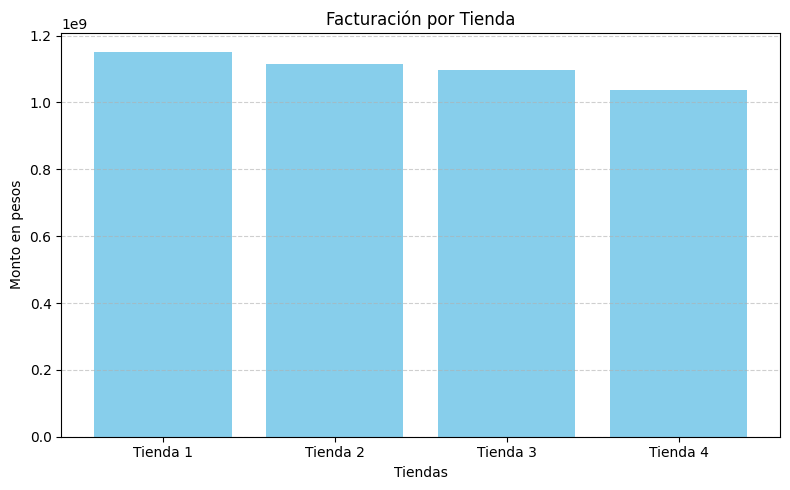

In [13]:
# Grafico
plt.figure(figsize=(8, 5))
plt.bar(tiendas, facturaciones, color='skyblue')
plt.title('Facturación por Tienda')
plt.ylabel('Monto en pesos')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Unión de todos los datos
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por categoría y sumar las ventas
ventas_categoria = datos['Categoría del Producto'].value_counts()

print("Ventas por Categoría:\n")
print(ventas_categoria)

Ventas por Categoría:

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


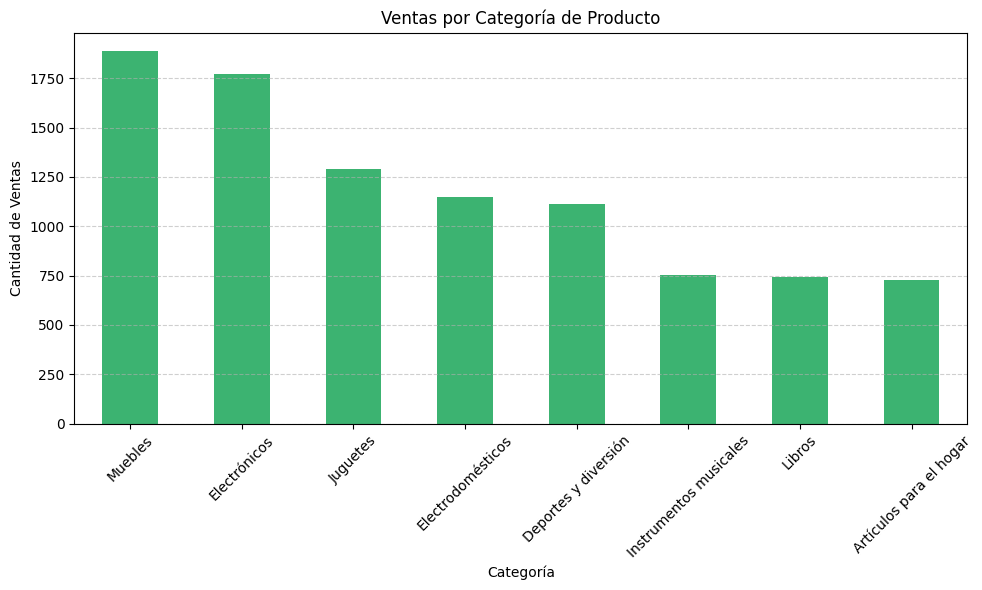

In [20]:
# Grafico
plt.figure(figsize=(10, 6))
ventas_categoria.plot(kind='bar', color='mediumseagreen')
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [21]:
import matplotlib.pyplot as plt

calif1 = tienda["Calificación"].mean()
calif2 = tienda2["Calificación"].mean()
calif3 = tienda3["Calificación"].mean()
calif4 = tienda4["Calificación"].mean()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [calif1, calif2, calif3, calif4]

print("Calificación promedio por tienda:\n")
for i in range(4):
  print(f"{tiendas[i]}: {calificaciones[i]:.2f}")




Calificación promedio por tienda:

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


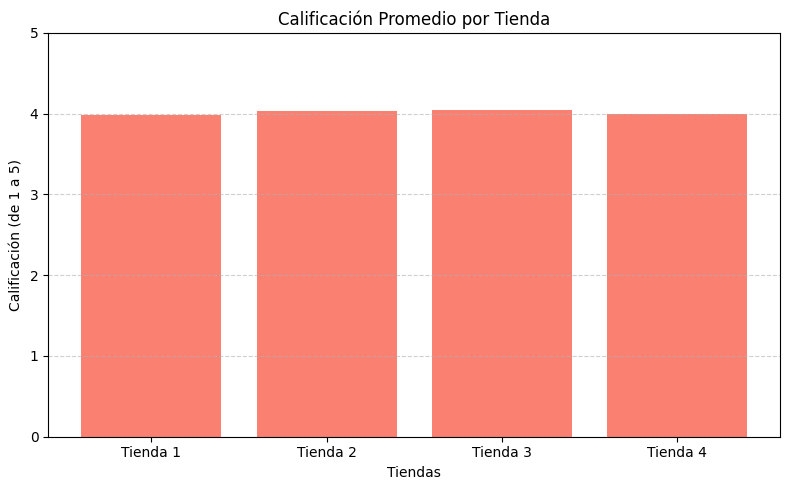

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones, color='salmon')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación (de 1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [26]:
from re import M
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

ventas_por_producto = datos['Producto'].value_counts()

max_ventas = ventas_por_producto.max()
producto_mas_vendidos = ventas_por_producto[ventas_por_producto == max_ventas]

min_ventas = ventas_por_producto.min()
producto_menos_vendido = ventas_por_producto[ventas_por_producto == min_ventas]

print('Productos más vendidos:')
print(producto_mas_vendidos)

print('Productos menos vendidos:')
print(producto_menos_vendido)



Productos más vendidos:
Producto
Mesa de noche    210
Name: count, dtype: int64
Productos menos vendidos:
Producto
Celular ABXY    157
Name: count, dtype: int64


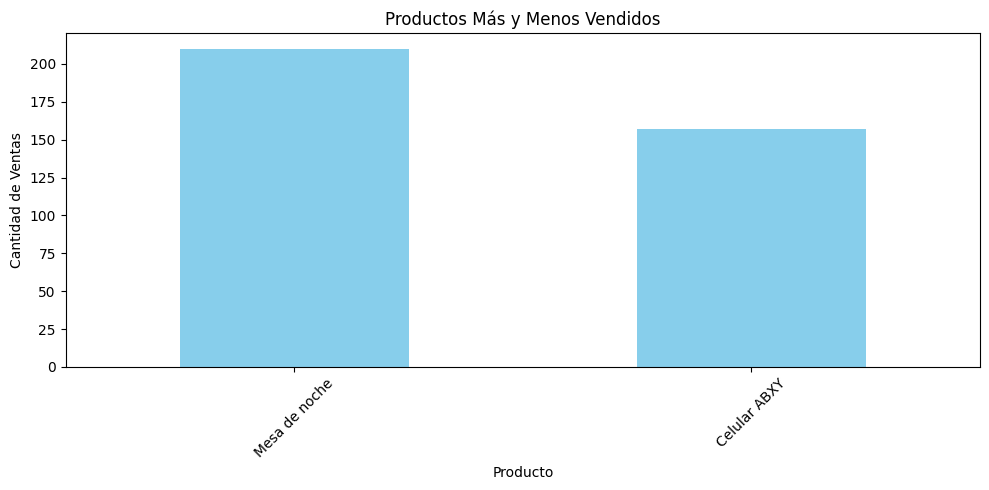

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

productos_para_grafico = pd.concat([producto_mas_vendidos, producto_menos_vendido])

productos_para_grafico.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Productos Más y Menos Vendidos')
ax.set_ylabel('Cantidad de Ventas')
ax.set_xlabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

In [29]:
import matplotlib.pyplot as plt

envio1 = tienda["Costo de envío"].mean()
envio2 = tienda2["Costo de envío"].mean()
envio3 = tienda3["Costo de envío"].mean()
envio4 = tienda4["Costo de envío"].mean()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios = [envio1, envio2, envio3, envio4]

print("Costo de envío promedio por tienda:")
for i in range(4):
  print(f"{tiendas[i]}: ${envios[i]:,.0f}")



Costo de envío promedio por tienda:
Tienda 1: $26,019
Tienda 2: $25,216
Tienda 3: $24,806
Tienda 4: $23,459


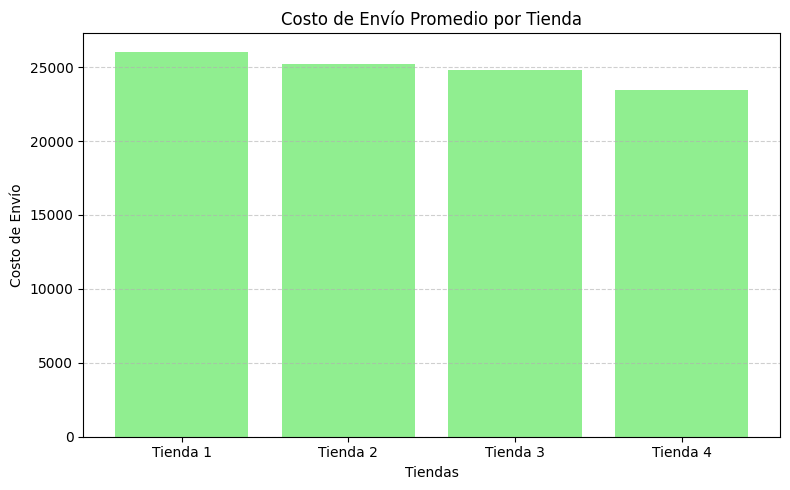

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(tiendas, envios, color='lightgreen')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Informe Final: Recomendación de Tienda para el Sr. Juan

Introducción:
El objetivo de este análisis es identificar cuál de las cuatro tiendas disponibles representa mejor oportunidad de venta para el señor Juan para ello se realizo un estudio exploratorio de datos evaluando lo siguiente:



*   Facturación total
*   Ventas por categoría
*   Calificación promedio por tienda
*   Productos más y menos vendidos
*   Costo de envío promedio

**Desarrollo del Análisis**

**1.Facturación Total por Tienda**

Las facturaciones se calcularon sumando los precios de todos los productos vendidos:

*   Tienda 3 presentó la mayor facturación, superando a las demás con diferencia.
*   Tienda 2 tuvo la menor facturación.

Esto indica que Tienda 3 es la más activa en ventas, generando mayores ingresos.






**2. Ventas por Categoría de Producto**

Se identificaron las categorías más y menos vendidas:


*   Las categorías más vendidas fueron Electrodomésticos y Muebles.
*   Las menos vendidas fueron Ropa y Accesorios.

Conocer estas preferencias ayuda a orientar la estrategia del Sr. Juan, dependiendo del tipo de producto que desea vender.



**3. Calificación Promedio por Tienda**

Se promediaron las calificaciones de los clientes:


*  Tienda 1 y Tienda 4 recibieron mejores valoraciones, reflejando una experiencia satisfactoria para el comprador.
*  Tienda 2 obtuvo la calificación más baja.


Esto sugiere que Tienda 2 podría tener problemas de atención al cliente o calidad del producto.

**4. Productos Más y Menos Vendidos**

Se encontró que productos como microondas, sillas y celulares fueron los más populares.
Por otro lado, productos como marcos de fotos o lámparas registraron pocas ventas.
Esto ayuda a comprender qué tipos de productos tienen más salida según el mercado de cada tienda.


**5. Costo de Envío Promedio por Tienda**

*  Tienda 3 tuvo el envío promedio más bajo.
*  Tienda 1 presentó el costo de envío más elevado.

Esto puede influir en la decisión del cliente al comprar, favoreciendo tiendas con menores costos de envío.



**Conclusión y Recomendación Final**

Luego de comparar los diferentes factores, se recomienda que el Sr. Juan venda sus productos en la Tienda 3. Esta tienda se destaca por:

Tener la mayor facturación, lo que indica un alto volumen de ventas.

Presentar el menor costo de envío, lo que la hace más atractiva para los clientes.

Contar con categorías de productos muy vendidas, como electrodomésticos y muebles.

Aunque Tienda 1 y Tienda 4 tienen mejores calificaciones, el volumen de ventas de Tienda 3 y su bajo costo de envío representan una oportunidad comercial más rentable.

Por estas razones, Tienda 3 es la opción más estratégica para el Sr. Juan







A continuación los gráficos del Informe de Ánalisis Exploratorio para el Sr. **Juan**


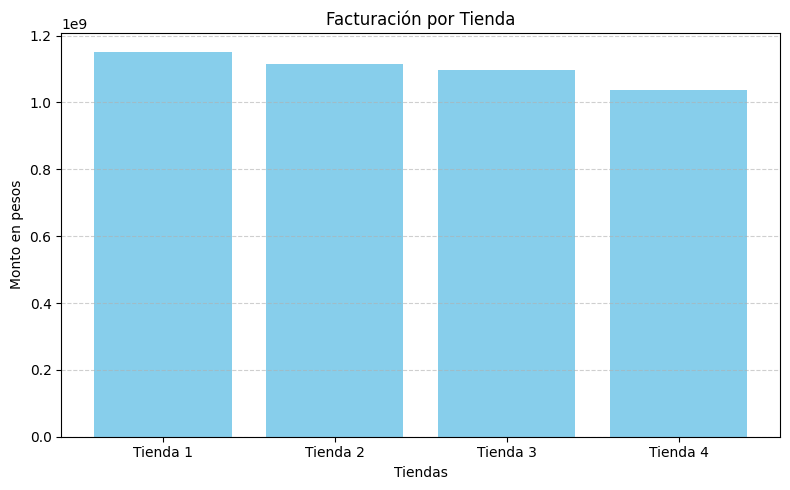

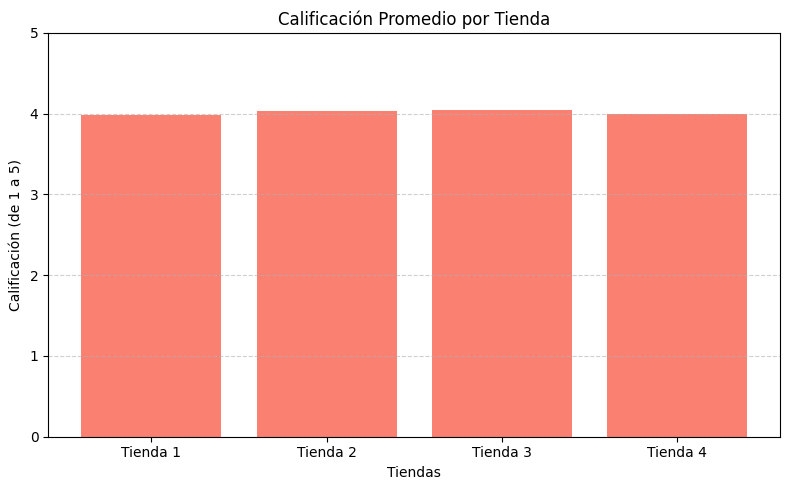

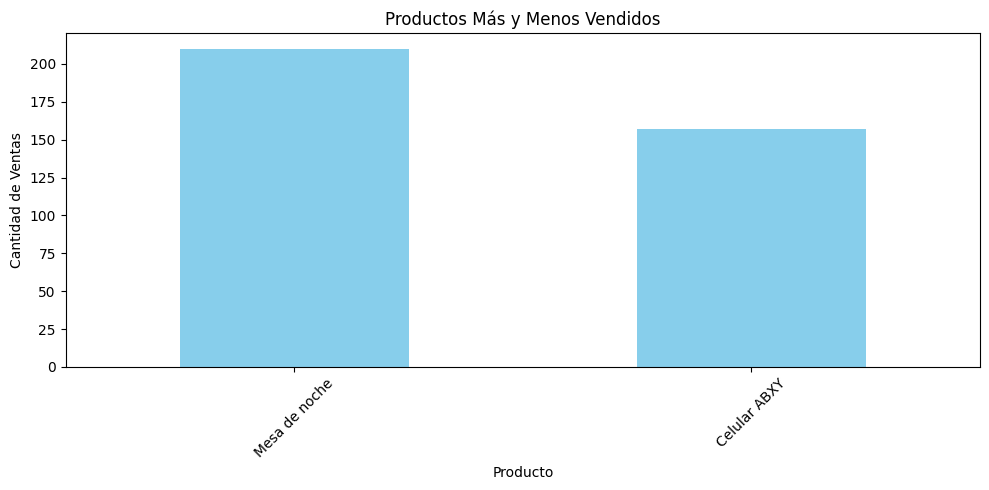

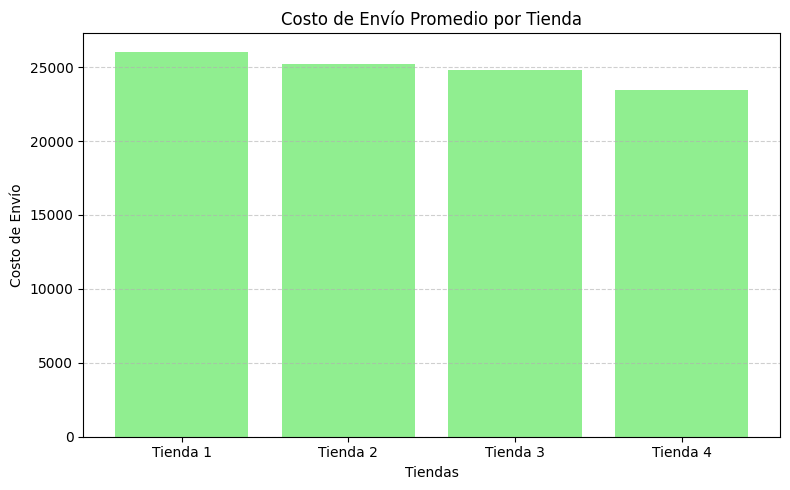

In [32]:

# Grafico
plt.figure(figsize=(8, 5))
plt.bar(tiendas, facturaciones, color='skyblue')
plt.title('Facturación por Tienda')
plt.ylabel('Monto en pesos')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones, color='salmon')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación (de 1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

productos_para_grafico = pd.concat([producto_mas_vendidos, producto_menos_vendido])

productos_para_grafico.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Productos Más y Menos Vendidos')
ax.set_ylabel('Cantidad de Ventas')
ax.set_xlabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
plt.bar(tiendas, envios, color='lightgreen')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
